In [4]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (7,5)
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Data/adult.csv')
print(f'Shape of our data set is {df.shape}')

Shape of our data set is (48842, 15)


# Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**: Understand the structure of the dataset, including the types and distribution of each feature.
    - Display the first few rows of the dataset.
    - Check for missing values and handle them appropriately.
    - Summarize the statistics for numerical features.
2. **Univariate Analysis**: Analyze the distribution of individual features.
    - Plot histograms and boxplots for numerical features.
    - Plot bar charts for categorical features.
3. **Bivariate Analysis**: Analyze the relationships between features and the target variable `income`.
    - Create boxplots and violin plots for numerical features against `income`.
    - Create bar plots and count plots for categorical features against `income`.
4. **Multivariate Analysis**: Analyze the interactions between multiple features.
    - Use pair plots or correlation heatmaps for numerical features.
    - Analyze interactions between categorical features and the target variable.
5. **Feature Engineering**: Create new features or modify existing ones if necessary.
    - Explore the creation of new features that may better capture the information in the data.

# Objectives for Principal Component Analysis (PCA)
1. **Standardization**: Standardize the numerical features to have zero mean and unit variance.
    - Apply standardization to ensure all features contribute equally to the PCA.
2. **PCA Implementation**: Perform PCA to reduce the dimensionality of the dataset.
    - Determine the number of principal components to retain by analyzing the explained variance ratio.
3. **Visualization**: Visualize the results of the PCA.
    - Plot the explained variance ratio for each principal component.
    - Create scatter plots of the first two or three principal components to visualize the data in reduced dimensions.
4. **Interpretation**: Interpret the principal components.
    - Analyze the loadings of the original features on the principal components to understand what each principal component represents.

# Objectives for Classification Model
1. **Data Preparation**: Prepare the data for modeling.
    - Encode categorical features using techniques such as one-hot encoding.
    - Split the data into training and testing sets.
2. **Model Selection**: Choose appropriate classification algorithms.
    - Explore various models such as Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines.
3. **Model Training**: Train the selected models on the training data.
    - Use cross-validation to tune hyperparameters and prevent overfitting.
4. **Model Evaluation**: Evaluate the performance of the models.
    - Use metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
    - Compare the performance of different models and select the best one.
5. **Model Interpretation**: Interpret the results of the classification model.
    - Analyze feature importances or coefficients to understand which features contribute most to the predictions.
6. **Model Deployment**: Prepare the final model for deployment.
    - Save the trained model and create a pipeline for new data predictions.
7. **Model Validation**: Validate the model on unseen data.
    - Ensure that the model generalizes well to new, unseen data by testing it on a separate validation set or using techniques like k-fold cross-validation.


### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Display the first few rows of the dataset.

# Dataset Explanation

The dataset comprises 46,033 observations and 15 features. Each feature provides different information about individuals, and these features are used to analyze and predict their income levels. Below is a detailed explanation of each feature:

1. **age**: 
    - Data Type: int64
    - Description: Represents the age of the individual in years.
    - Non-Null Count: 46,033 (No missing values)

2. **workclass**: 
    - Data Type: object
    - Description: Indicates the type of employment (e.g., Private, Self-Employed).
    - Non-Null Count: 46,033 (No missing values)

3. **fnlwgt**: 
    - Data Type: int64
    - Description: Final weight, which is a statistical weight assigned to the individual.
    - Non-Null Count: 46,033 (No missing values)

4. **education**: 
    - Data Type: object
    - Description: Indicates the highest level of education attained by the individual.
    - Non-Null Count: 46,033 (No missing values)

5. **educational-num**: 
    - Data Type: int64
    - Description: Numerical representation of the education level.
    - Non-Null Count: 46,033 (No missing values)

6. **marital-status**: 
    - Data Type: object
    - Description: Indicates the marital status of the individual (e.g., Married, Single).
    - Non-Null Count: 46,033 (No missing values)

7. **occupation**: 
    - Data Type: object
    - Description: Represents the occupation of the individual (e.g., Technician, Executive).
    - Non-Null Count: 46,033 (No missing values)

8. **relationship**: 
    - Data Type: object
    - Description: Indicates the relationship of the individual within a household (e.g., Husband, Not-in-family).
    - Non-Null Count: 46,033 (No missing values)

9. **race**: 
    - Data Type: object
    - Description: Represents the race of the individual (e.g., White, Black).
    - Non-Null Count: 46,033 (No missing values)

10. **gender**: 
    - Data Type: object
    - Description: Indicates the gender of the individual (e.g., Male, Female).
    - Non-Null Count: 46,033 (No missing values)

11. **capital-gain**: 
    - Data Type: int64
    - Description: Represents the capital gains of the individual.
    - Non-Null Count: 46,033 (No missing values)

12. **capital-loss**: 
    - Data Type: int64
    - Description: Represents the capital losses of the individual.
    - Non-Null Count: 46,033 (No missing values)

13. **hours-per-week**: 
    - Data Type: int64
    - Description: Indicates the number of hours the individual works per week.
    - Non-Null Count: 46,033 (No missing values)

14. **native-country**: 
    - Data Type: object
    - Description: Indicates the native country of the individual.
    - Non-Null Count: 46,033 (No missing values)

15. **income**: 
    - Data Type: object
    - Description: Target variable indicating whether the individual's income is more than 50k or not. It holds two values: '>50K' or '<=50K'.
    - Non-Null Count: 46,033 (No missing values)

This dataset is well-suited for classification tasks aimed at predicting whether an individual's income exceeds 50k based on their personal and demographic information.


In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Check for missing values and handle them appropriately.

<i> We dont have any missing or na vallue in this dataset </i>

In [7]:
df.isnull().sum() + df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Objectives for Exploratory Data Analysis (EDA)
1. **Data Overview**:
    - Summarize the Statistics for Numerical Features

# Summarize the Statistics for Numerical Features

To gain an initial understanding of the dataset, we summarize the statistics for the numerical features. This summary provides insights into the central tendency, dispersion, and shape of the distribution of each numerical feature. Here are the steps and the type of statistics we typically look at:

1. **Mean**: The average value of the feature.
    - Gives an idea of the central value for the data.

2. **Median**: The middle value when the data is ordered.
    - Provides a measure of central tendency that is not affected by outliers.

3. **Standard Deviation (std)**: Measures the dispersion or spread of the values around the mean.
    - Indicates how much variation exists from the mean.

4. **Minimum (min)**: The smallest value in the dataset.
    - Useful for understanding the range and detecting potential outliers.

5. **Maximum (max)**: The largest value in the dataset.
    - Useful for understanding the range and detecting potential outliers.

6. **25th Percentile (Q1)**: The value below which 25% of the data falls.
    - Helps to understand the lower quartile distribution.

7. **50th Percentile (Median)**: The value below which 50% of the data falls.
    - Another measure of central tendency.

8. **75th Percentile (Q3)**: The value below which 75% of the data falls.
    - Helps to understand the upper quartile distribution.

9. **Interquartile Range (IQR)**: The difference between Q3 and Q1.
    - Measures the range within which the central 50% of the data lies and helps identify outliers.

10. **Count**: The number of non-null entries for the feature.
    - Confirms the amount']
df[numerical_features].describe()


In [8]:
numeric_columns = df.select_dtypes(exclude=['object'])
numeric_columns.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
educational-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


### Objectives for Exploratory Data Analysis (EDA)
2. **Univariate Analysis**:
    - Plot histograms and boxplots for numerical features.

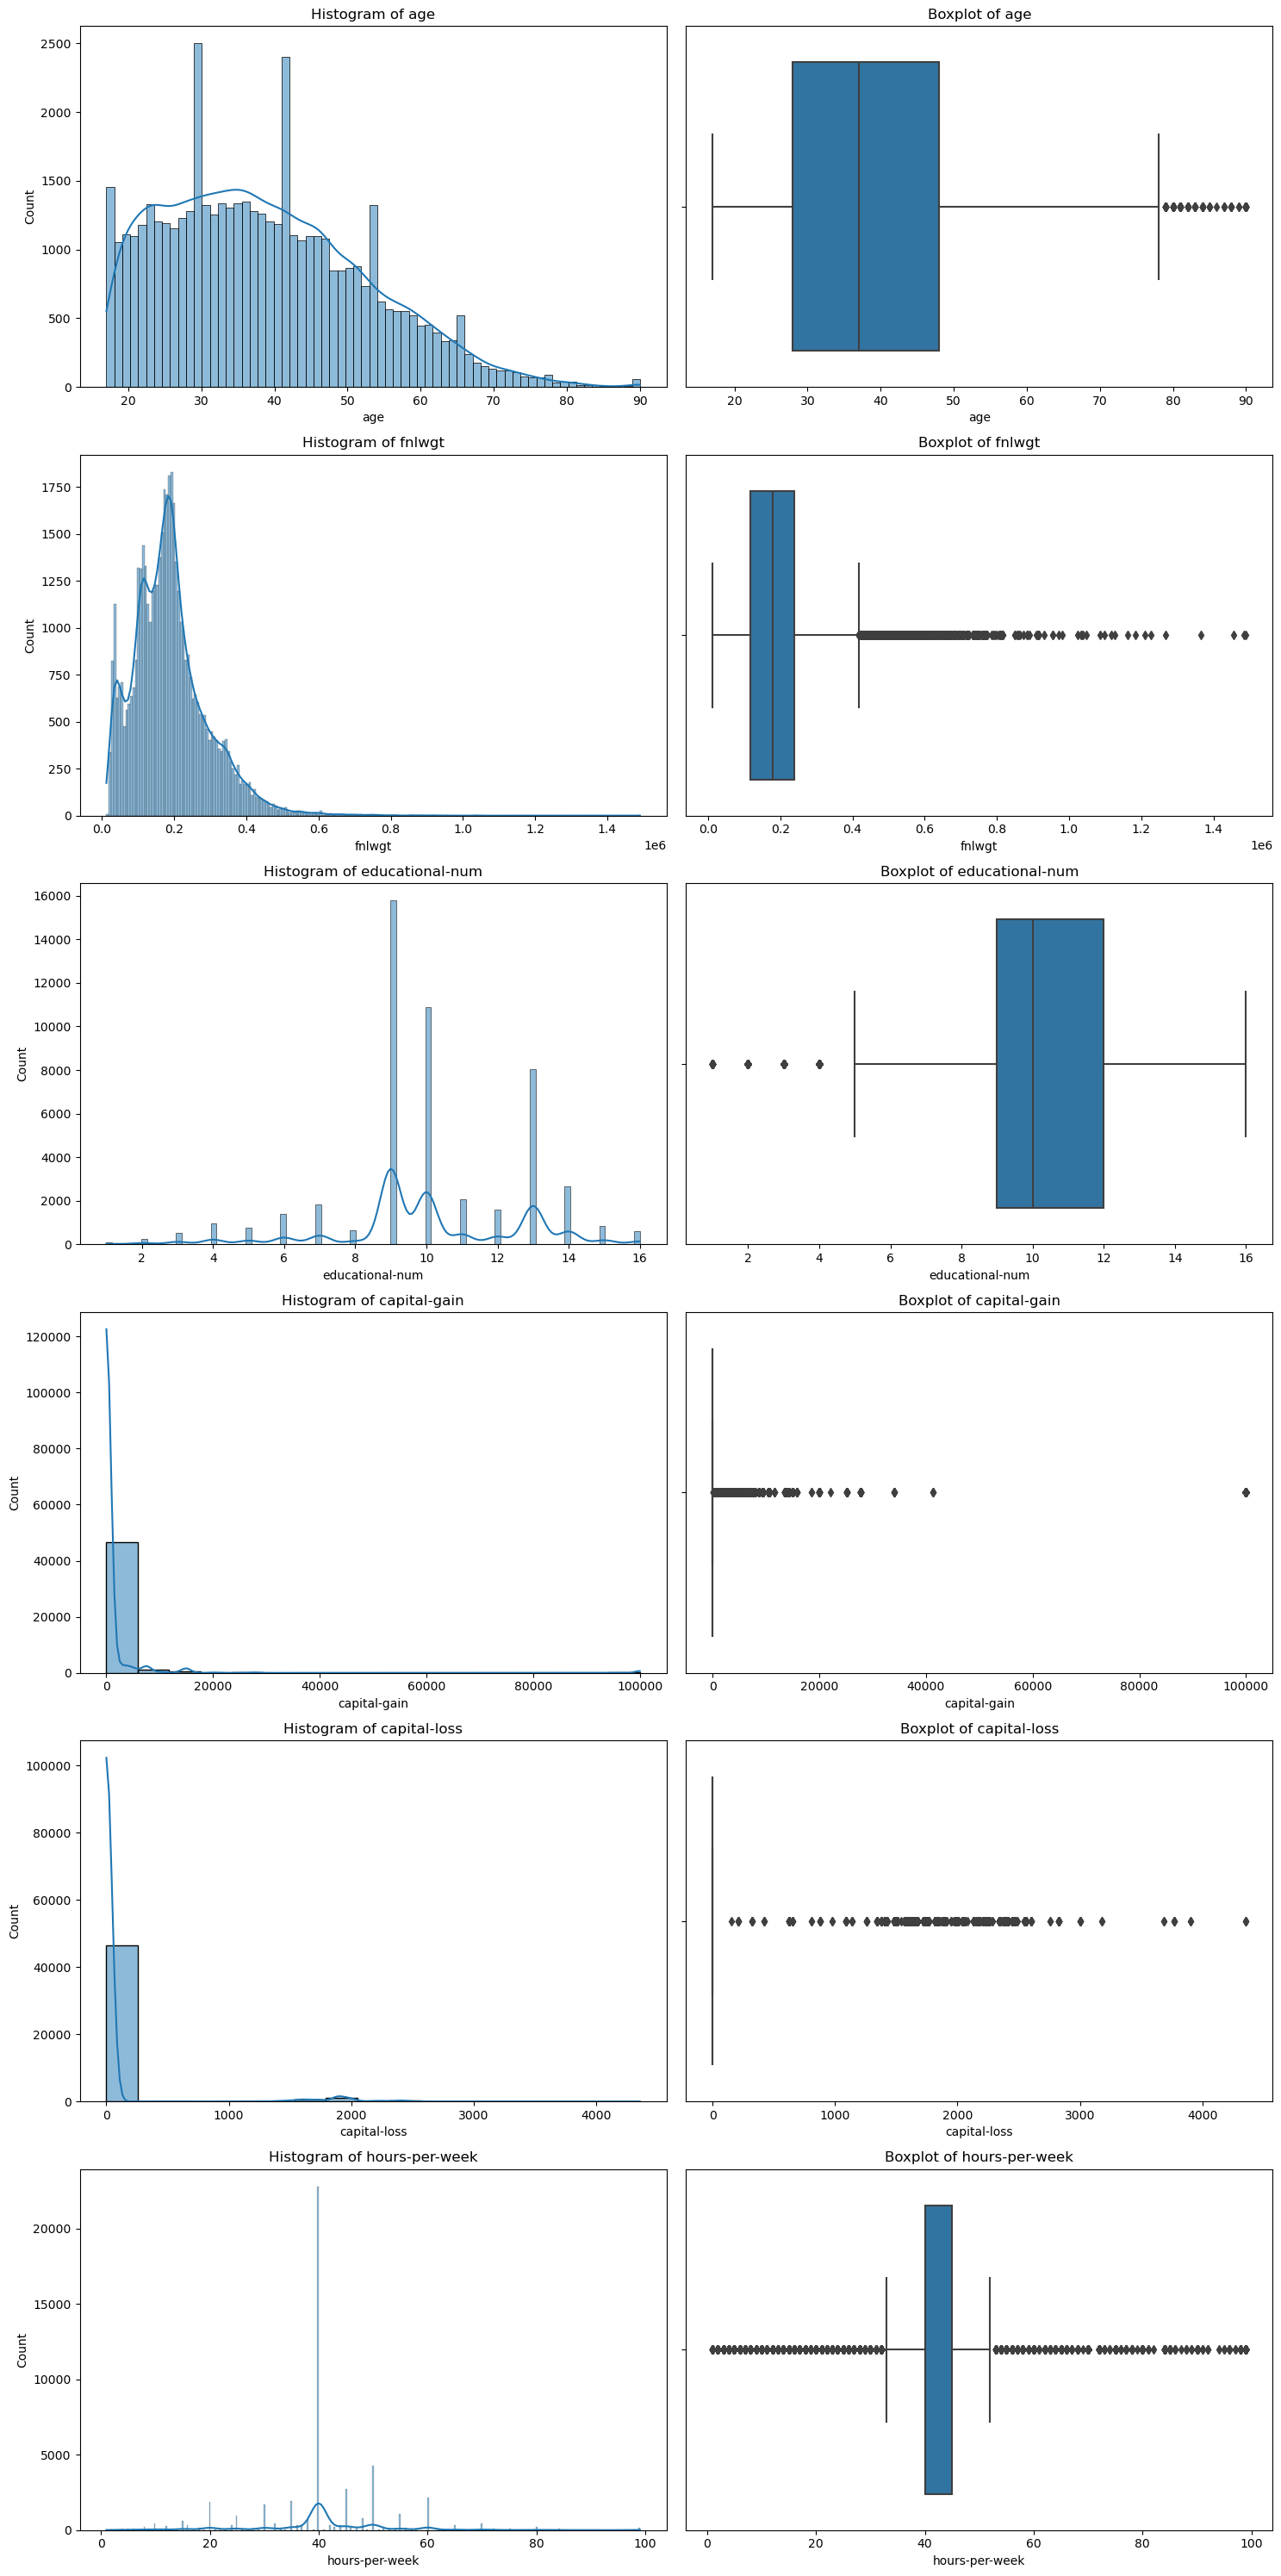

In [13]:
#numerical_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numerical_features = list(df.select_dtypes(exclude=['object']).columns)
numerical_num_features = len(numerical_features)
fig, axes = plt.subplots(numerical_num_features, 2, figsize=(15, 5 * numerical_num_features))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    sns.boxplot(data=df, x=feature, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
2. **Univariate Analysis**:
    - Plot bar charts for categorical features.

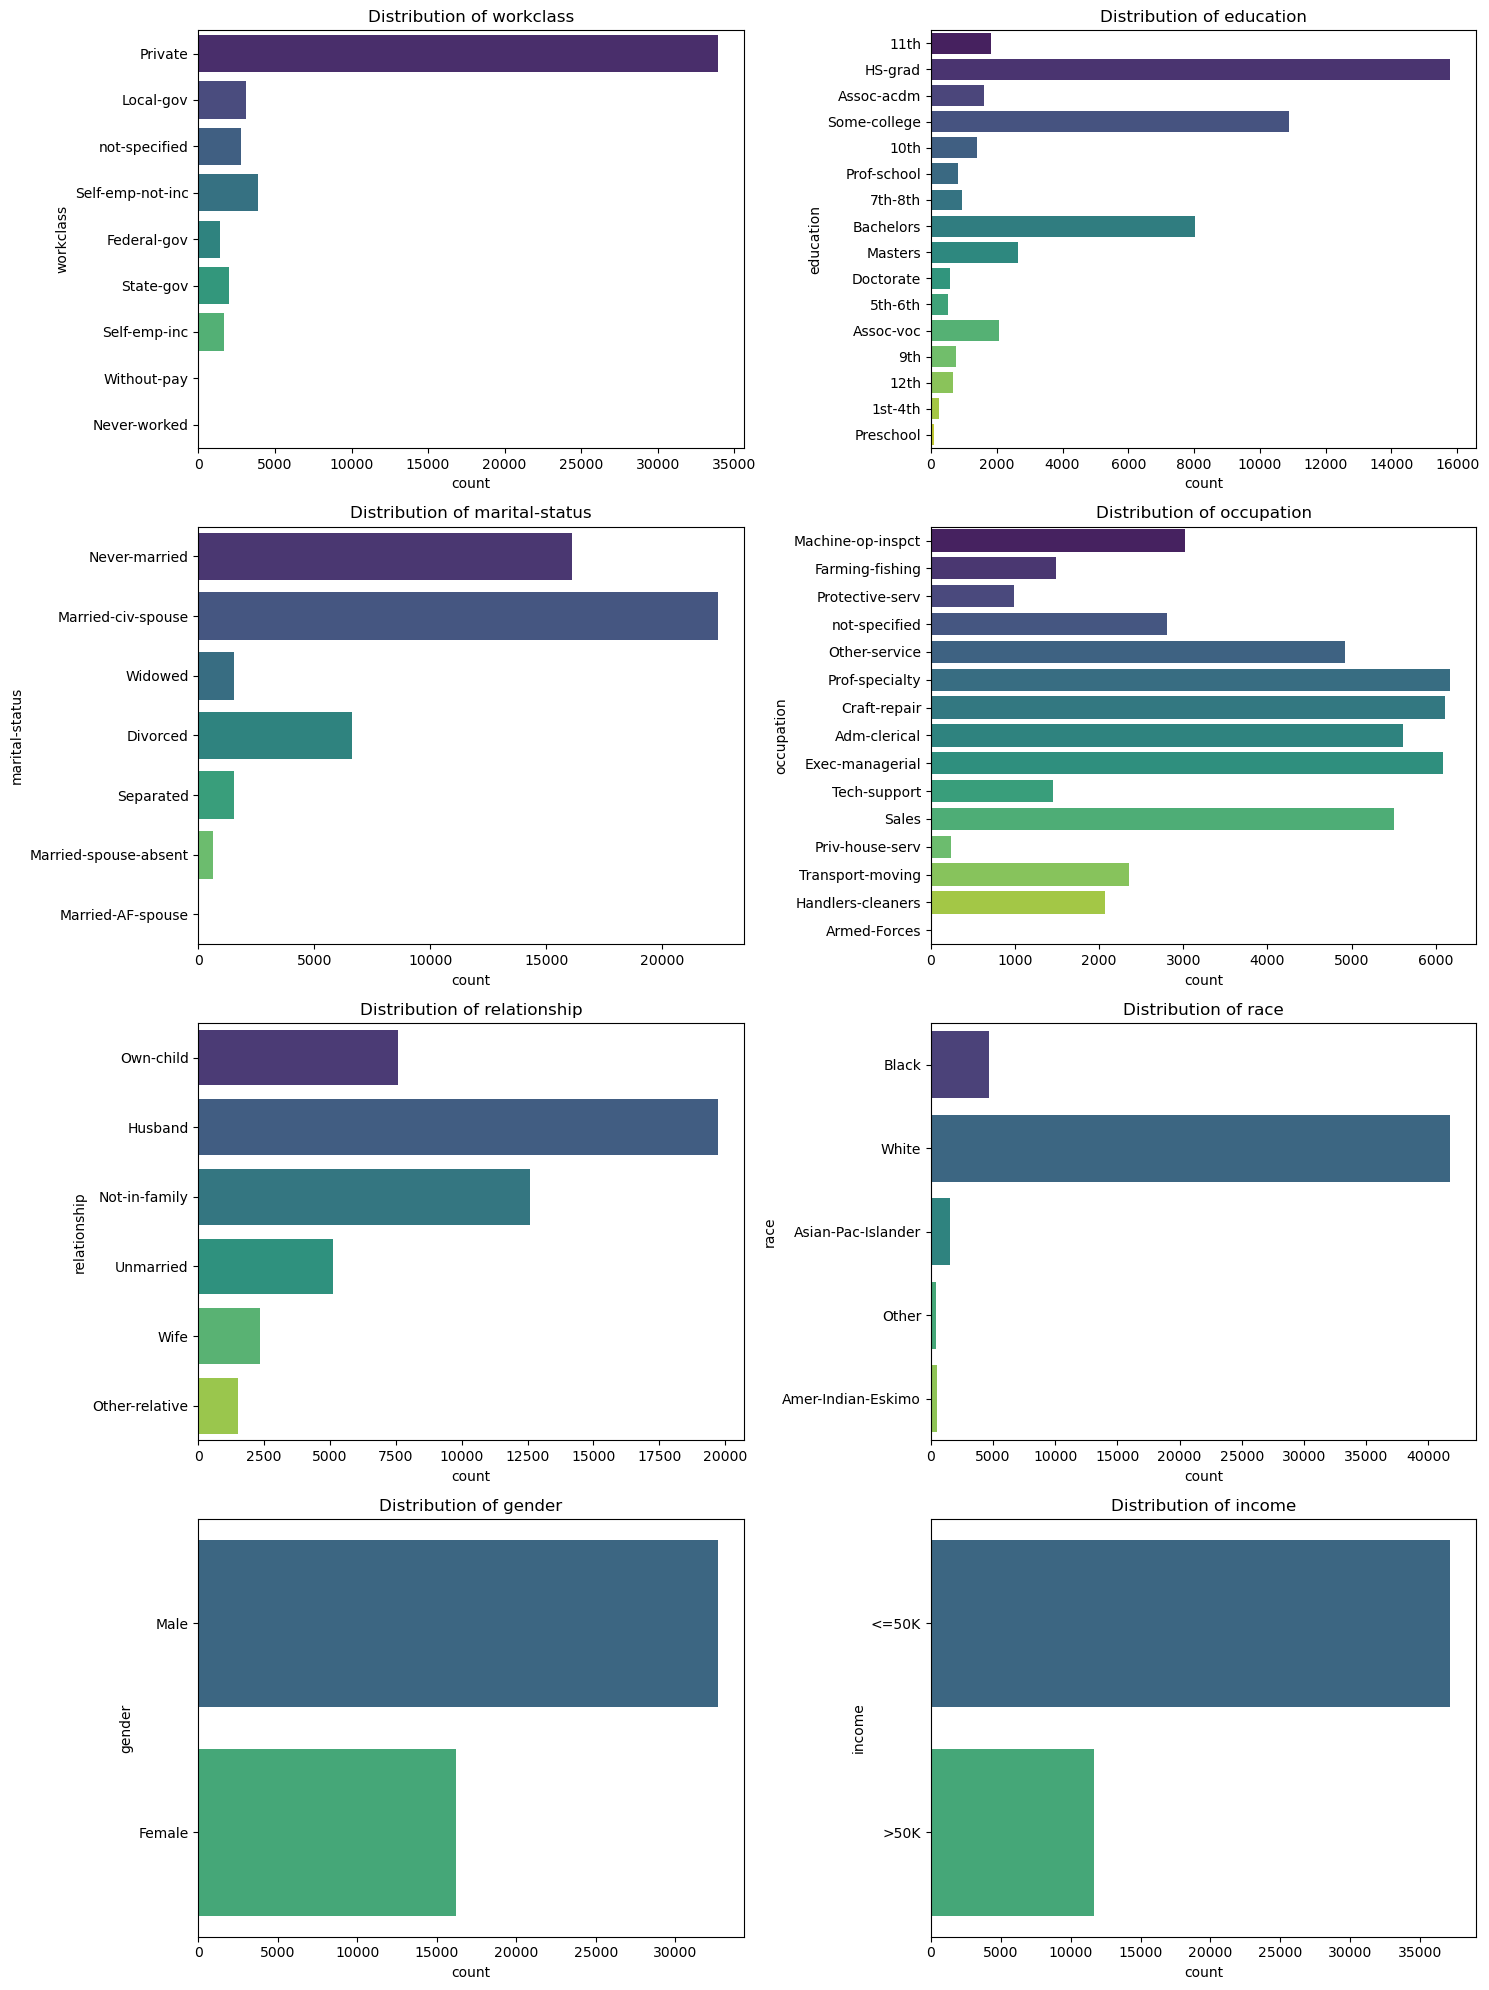

In [11]:
non_numeric_columns = df.select_dtypes(include=['object'])
non_numeric_columns['occupation'].replace('?', 'not-specified', inplace=True)
non_numeric_columns['workclass'].replace('?', 'not-specified', inplace=True)
non_numeric_columns_names = list(non_numeric_columns.columns)
non_numeric_columns_names.remove('native-country')
non_numeric_columns_names_len = len(non_numeric_columns_names)

nrows = (non_numeric_columns_names_len + 1) // 2

fig, axes = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 5 * nrows))

axes = axes.flatten()

for i, col_name in enumerate(non_numeric_columns_names):
    sns.countplot(data=non_numeric_columns, y=col_name, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col_name}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
3. **Bivariate Analysis**:
    - Create boxplots and violin plots for numerical features against `income`.

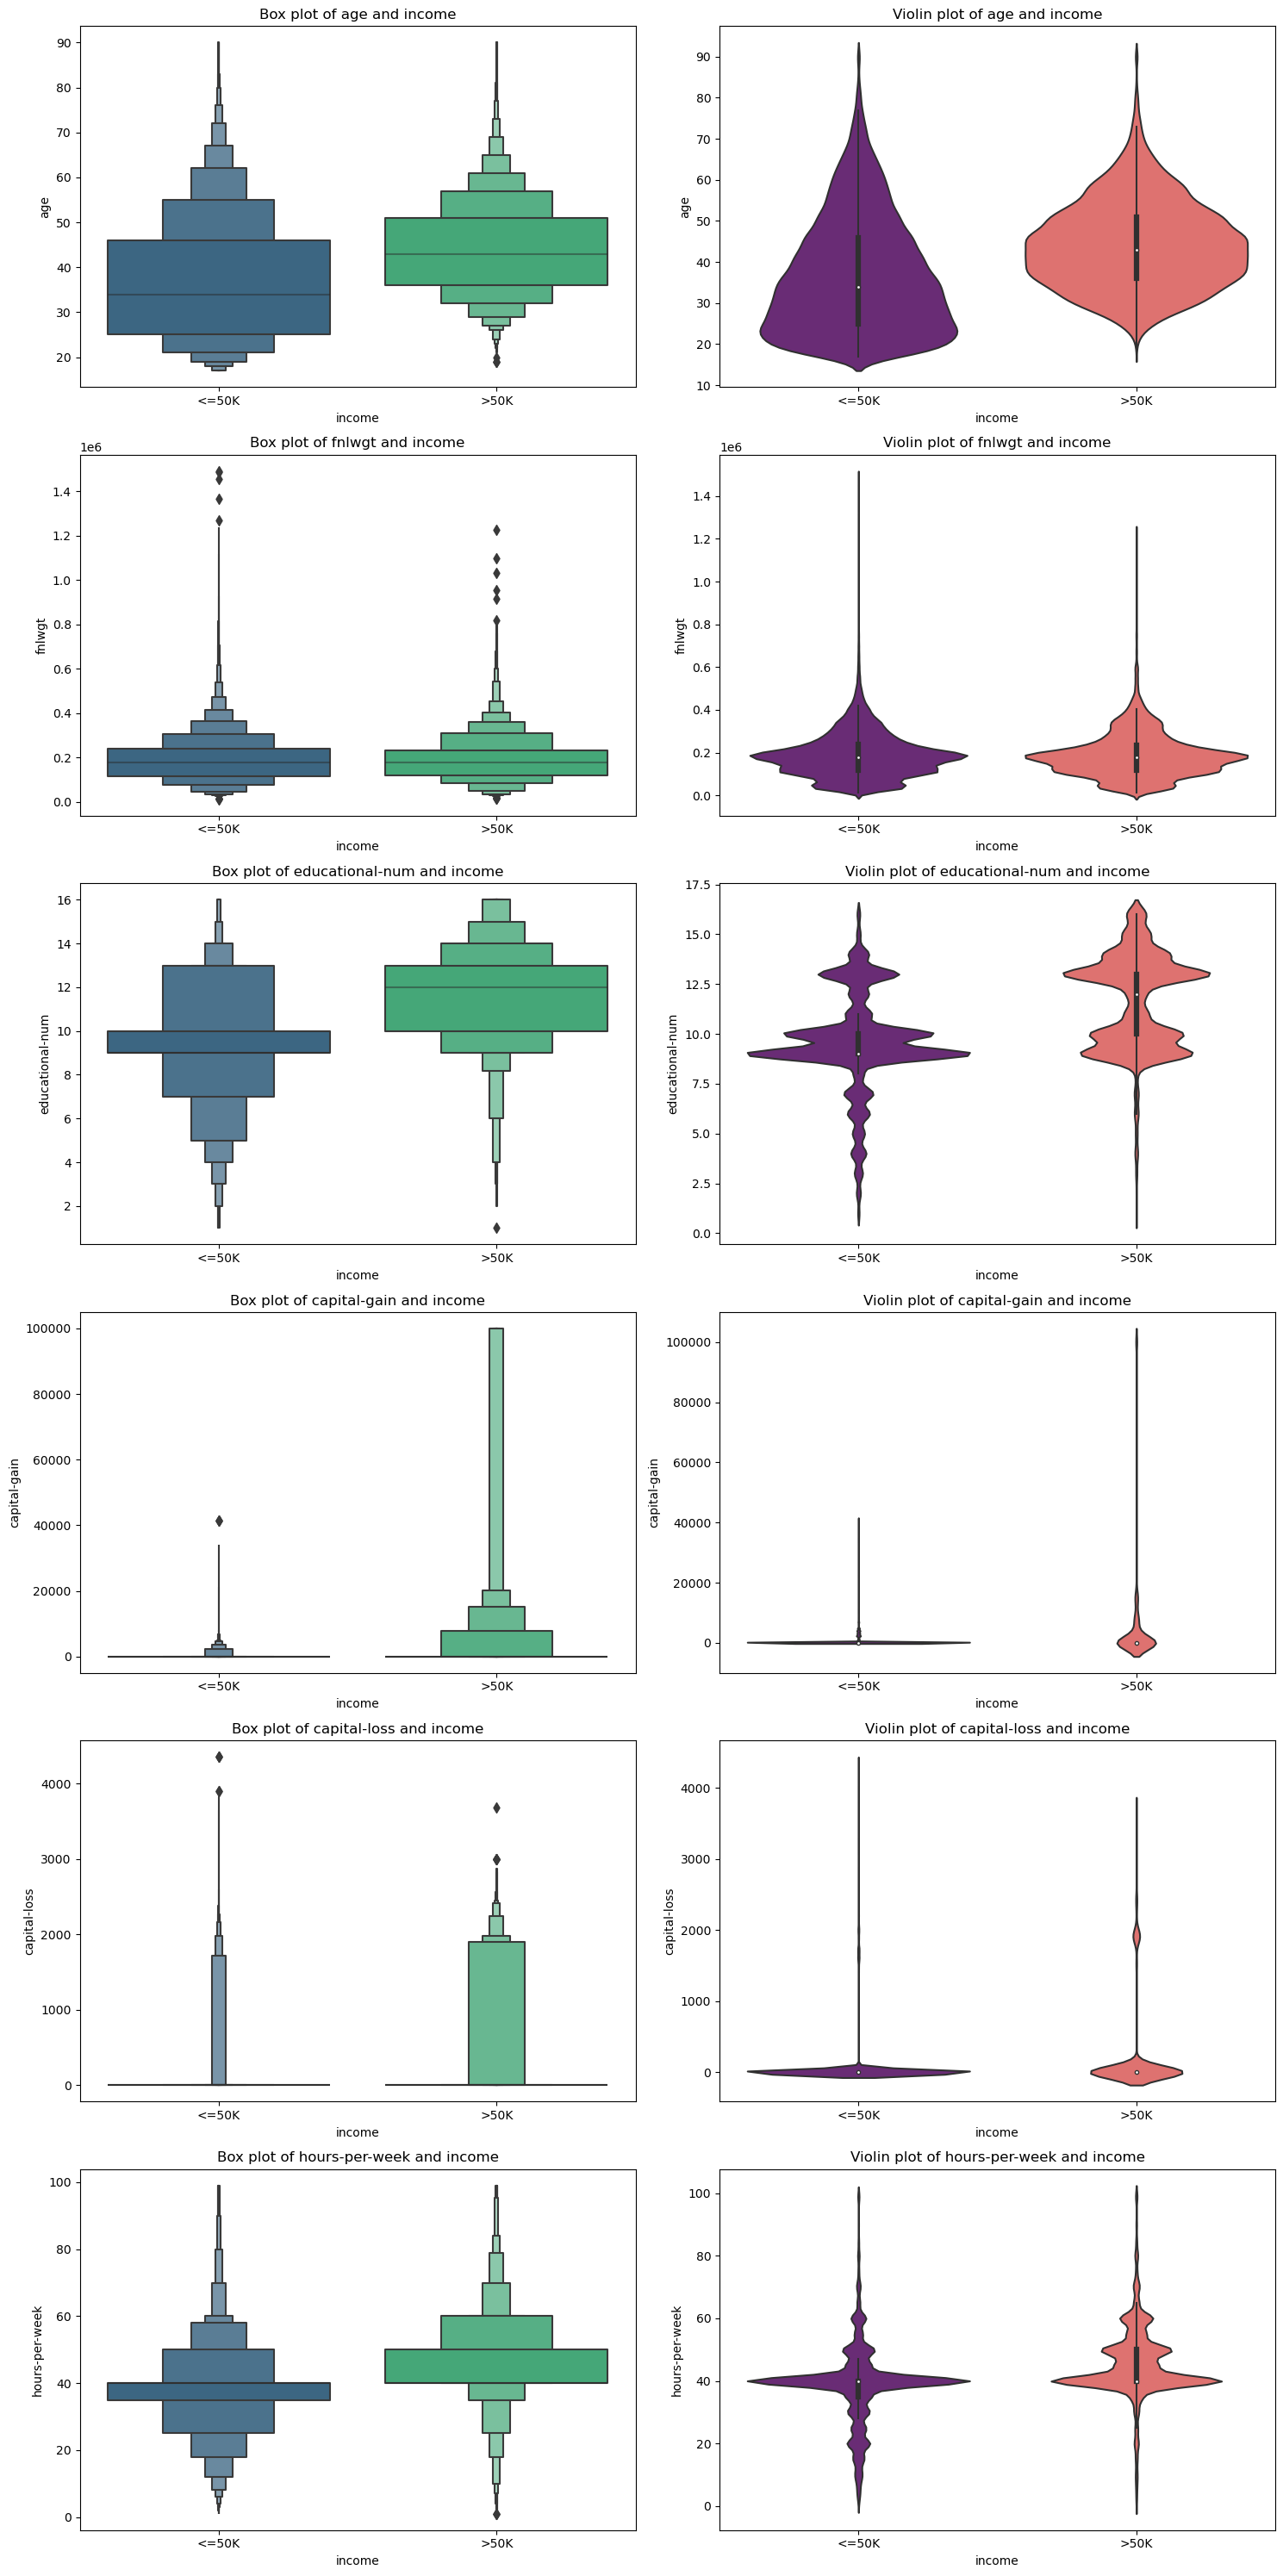

In [24]:
fig, axes = plt.subplots(nrows = numerical_num_features, ncols=2, figsize=(15, 5 * numerical_num_features))

for i, col_name in enumerate(numerical_features):
    sns.boxenplot(data=df, y=col_name, x='income', ax=axes[i, 0], palette='viridis')
    axes[i, 0].set_title(f'Box plot of {col_name} and income')
    sns.violinplot(data=df, y=col_name, x='income', ax=axes[i, 1], palette='magma')  # Use violinplot here
    axes[i, 1].set_title(f'Violin plot of {col_name} and income')

    
plt.tight_layout()
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
3. **Bivariate Analysis**:
    - Create bar plots and count plots for categorical features against `income`.

In [58]:
non_numeric_columns.groupby(by=['income', 'workclass']).size().reset_index()

,income,workclass,0
0,<=50K,Federal-gov,871
1,<=50K,Local-gov,2209
2,<=50K,Never-worked,10
3,<=50K,Private,26519
4,<=50K,Self-emp-inc,757
5,<=50K,Self-emp-not-inc,2785
6,<=50K,State-gov,1451
7,<=50K,Without-pay,19
8,<=50K,not-specified,2534
9,>50K,Federal-gov,561


In [61]:
# fig, axes = plt.subplots(nrows = (non_numeric_columns_names_len + 1) // 2, ncols=2, figsize=(15, 5 * non_numeric_columns_names_len // 2))
# axes = axes.flatten()

# for i, col_name in enumerate(non_numeric_columns_names):
#     agg_data = non_numeric_columns.groupby(by=['income', col_name]).size().reset_index()
#     agg_data_more_than_50 = agg_data[agg_data['income'] == '>50K'].drop(columns=['income'])
#     agg_data_less_than_50 = agg_data[agg_data['income'] == '<=50K'].drop(columns=['income'])
#     sns.barplot(data=agg_data_more_than_50, ax=axes[i])
#     sns.barplot(data=agg_data_less_than_50, ax=axes[i])
#     axes[i].set_title(f'Distribution of {col_name} on income')

# plt.tight_layout()
# plt.show()

### Objectives for Exploratory Data Analysis (EDA)
4. **Multivariate Analysis**: Analyze the interactions between multiple features.
    - Use pair plots or correlation heatmaps for numerical features.

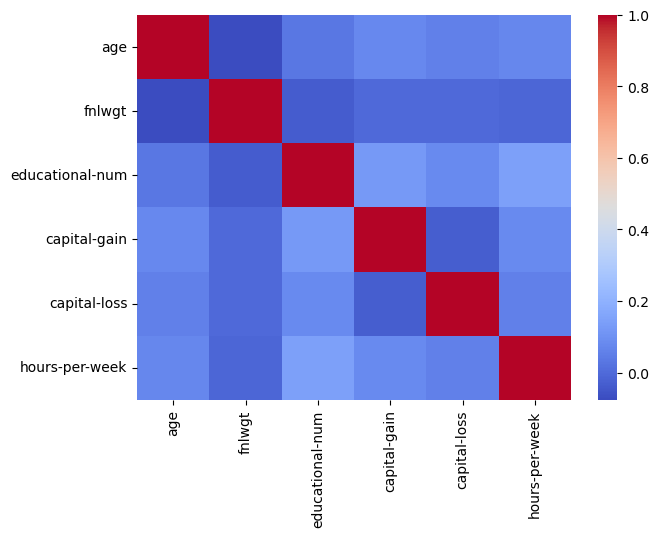

In [62]:
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

### Objectives for Exploratory Data Analysis (EDA)
4. **Multivariate Analysis**: Analyze the interactions between multiple features.
    - Analyze interactions between categorical features and the target variable.

## Cleaning Data set
- Converting high school education to non-graduate
- Removing rows that does not hold occupation
- Removing collumns that do not provide useful information

### Converting all the high school level to non-graduate level

In [63]:
non_graduated_values = ['11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']

def replace_non_graduate_values(education_level):
    if education_level in non_graduated_values:
        return 'non-graduate'
    return education_level

df['education'] = df['education'].apply(replace_non_graduate_values)